In [1]:
import os
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import pandas as pd
import csv
from glob import glob

In [2]:
id2label = {
    0: 'Idle',
    1: 'Toric Marking',
    2: 'Implant Ejection',
    3: 'Incision',
    4: 'Viscodilatation',
    5: 'Capsulorhexis',
    6: 'Hydrodissetion',
    7: 'Nucleus Breaking',
    8: 'Phacoemulsification',
    9: 'Vitrectomy',
    10: 'Irrigation/Aspiration',
    11: 'Preparing Implant',
    12: 'Manual Aspiration',
    13: 'Implantation',
    14: 'Positioning',
    15: 'OVD Aspiration',
    16: 'Suturing',
    17: 'Sealing Control',
    18: 'Wound Hydratation',
}

label2id = {v: k for k, v in id2label.items()}

In [3]:
train_annos = sorted(glob('../train/??/*.csv'))

In [4]:
train_annos

['../train/01/train01.csv',
 '../train/02/train02.csv',
 '../train/03/train03.csv',
 '../train/04/train04.csv',
 '../train/05/train05.csv',
 '../train/06/train06.csv',
 '../train/07/train07.csv',
 '../train/08/train08.csv',
 '../train/09/train09.csv',
 '../train/10/train10.csv',
 '../train/11/train11.csv',
 '../train/12/train12.csv',
 '../train/13/train13.csv',
 '../train/14/train14.csv',
 '../train/15/train15.csv',
 '../train/16/train16.csv',
 '../train/17/train17.csv',
 '../train/18/train18.csv',
 '../train/19/train19.csv',
 '../train/20/train20.csv',
 '../train/21/train21.csv',
 '../train/22/train22.csv',
 '../train/23/train23.csv',
 '../train/24/train24.csv',
 '../train/25/train25.csv']

In [52]:
train01 = pd.read_csv(train_annos[0])

In [23]:
train01

,Frame,Steps
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
14375,14376,0
14376,14377,0
14377,14378,0
14378,14379,0


## 各工程（クラス）のバランス

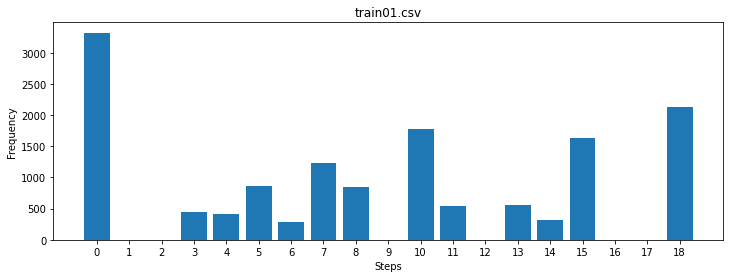

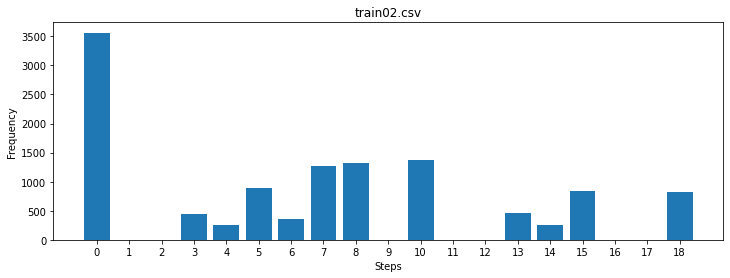

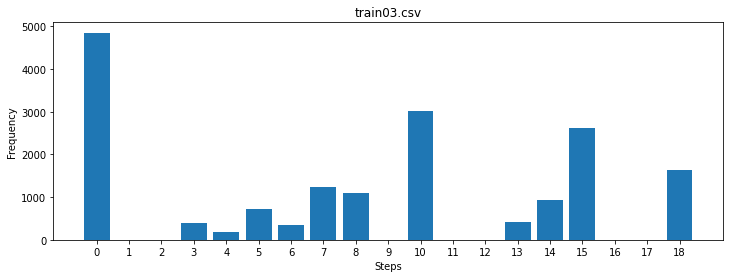

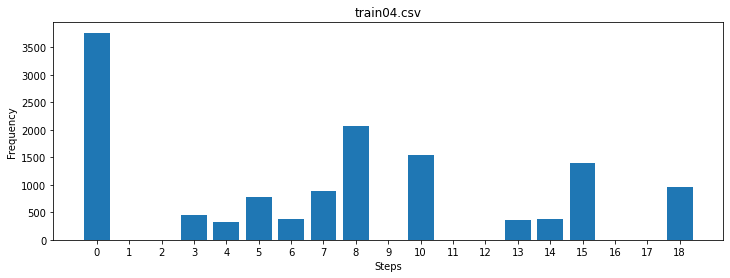

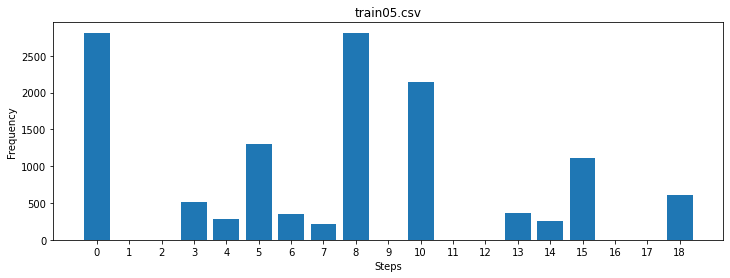

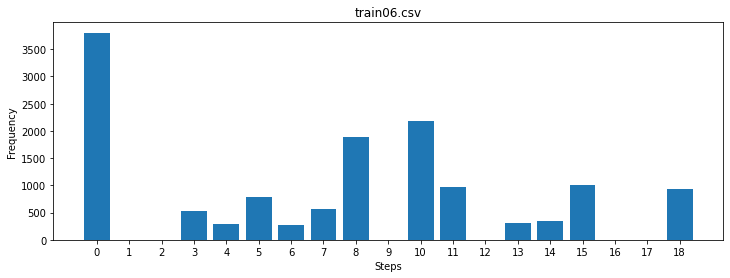

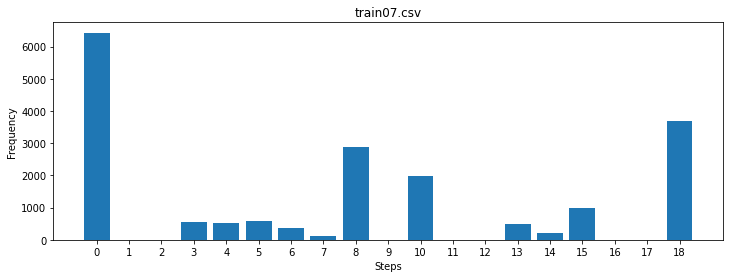

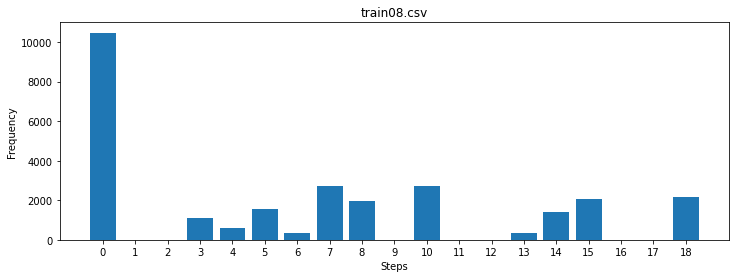

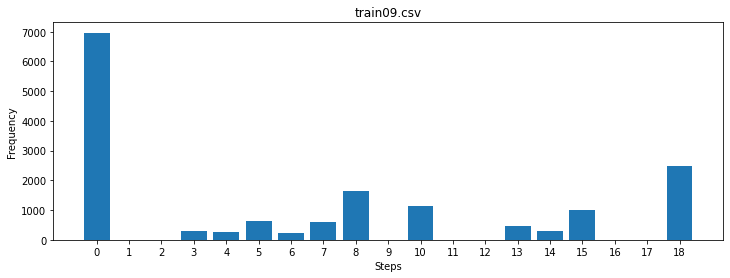

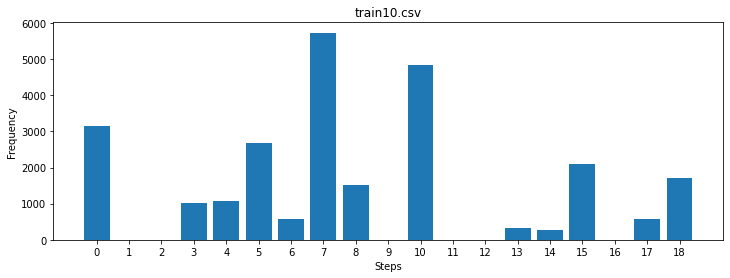

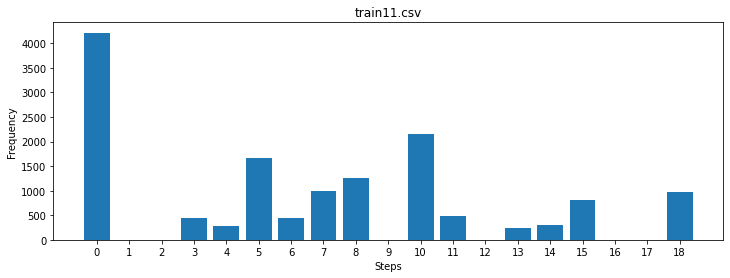

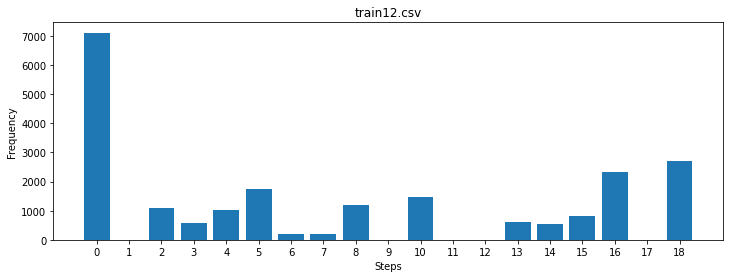

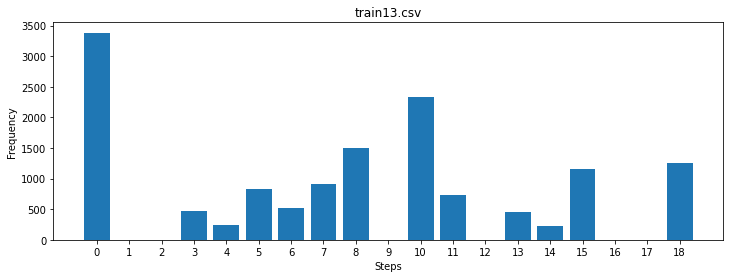

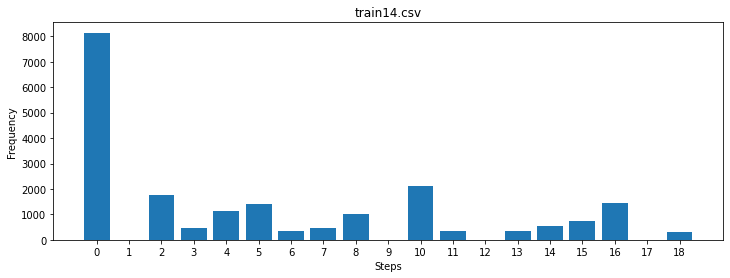

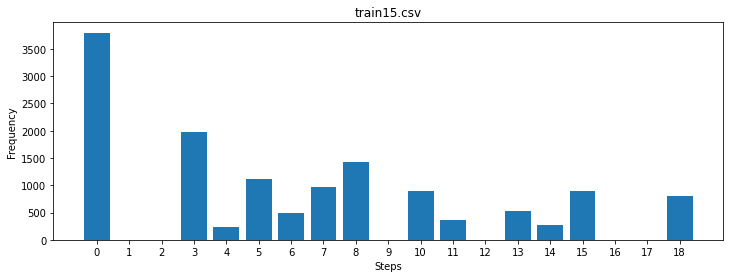

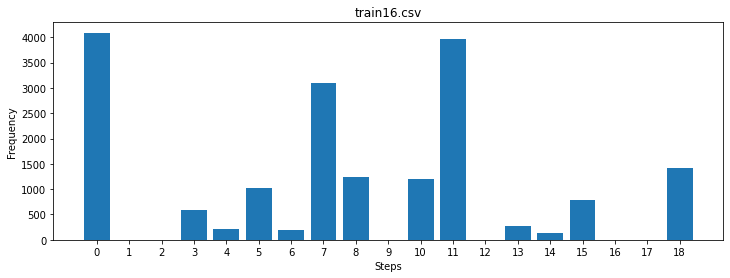

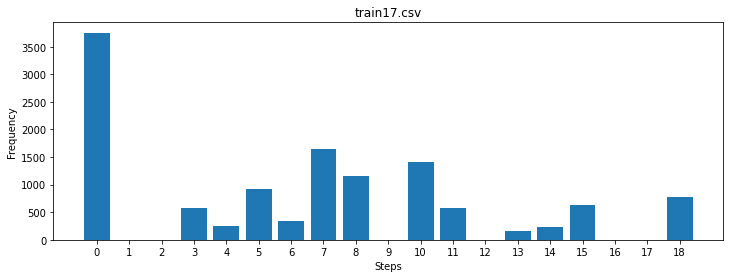

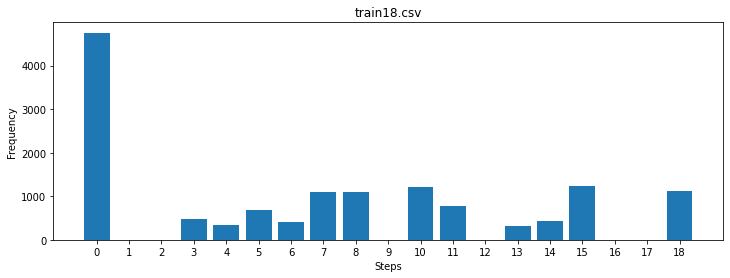

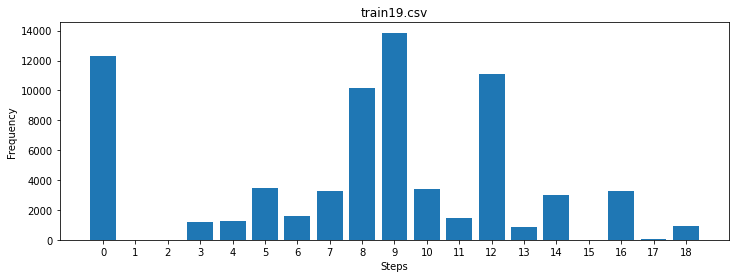

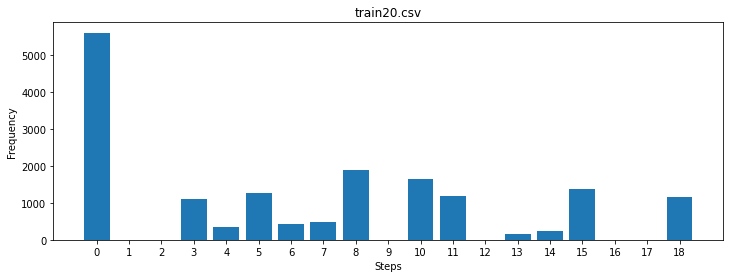

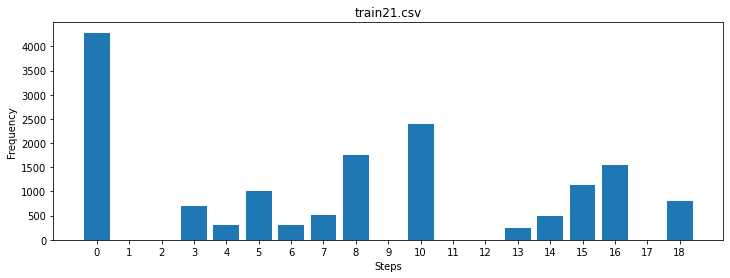

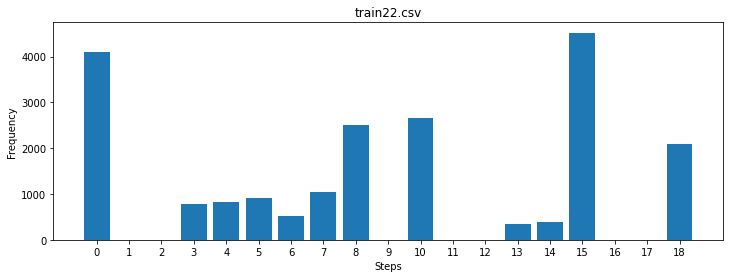

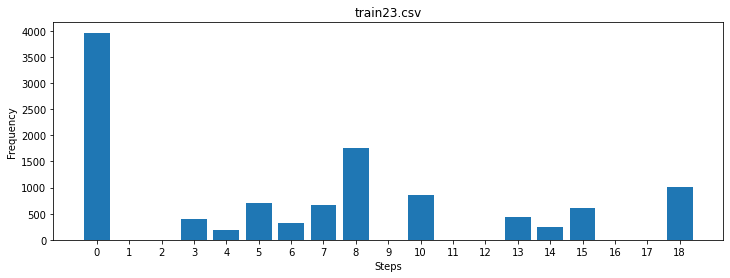

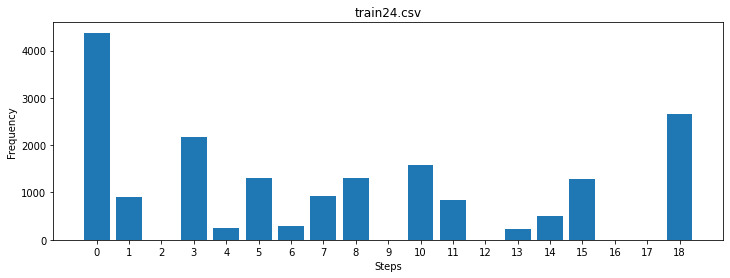

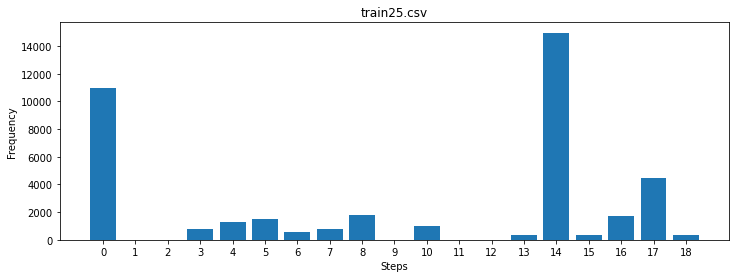

In [5]:
for csv_path in train_annos:
    df = pd.read_csv(csv_path)
    ids, cnts = np.unique(df['Steps'],return_counts=True)  # 工程の頻度を計算

    plt.figure(figsize=(12, 4))
    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))  # 横軸目盛を整数に
    
    plt.bar(ids, cnts)
    plt.title(os.path.basename(csv_path))
    plt.xlabel('Steps')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(0, 19, 1))  # 横軸目盛を明示的につける
    plt.show()

## 各動画の工程の推移

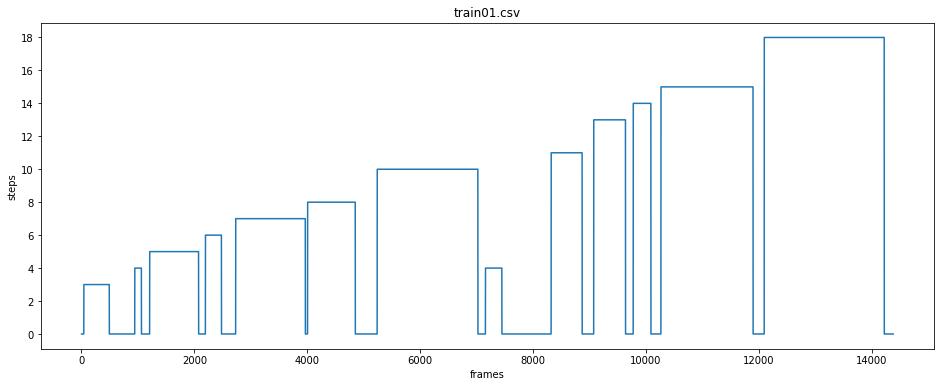

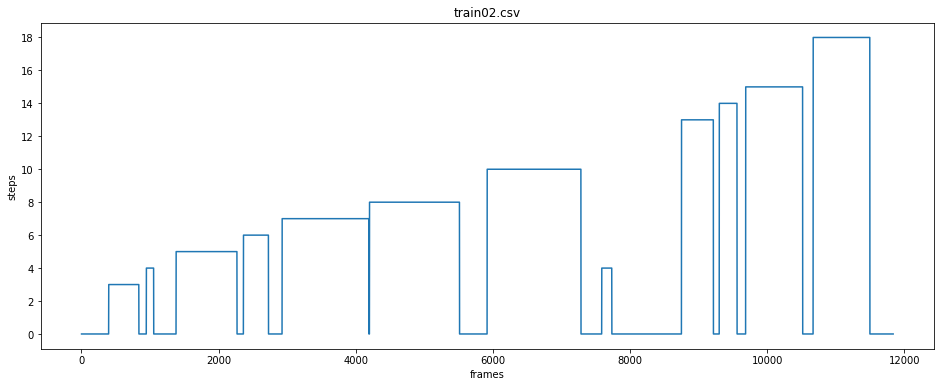

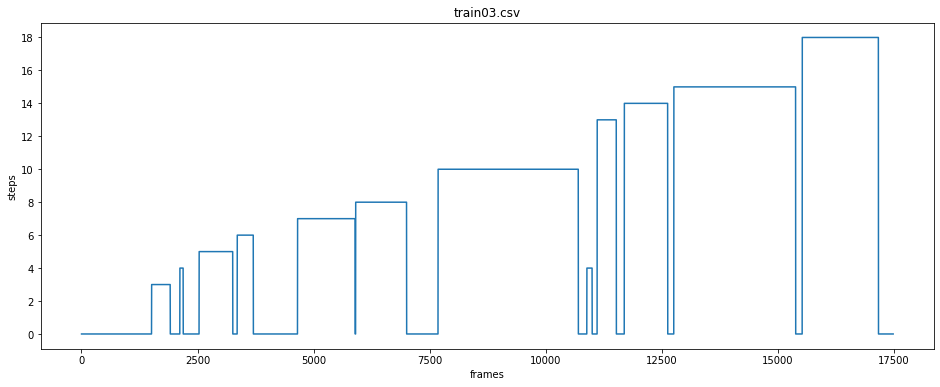

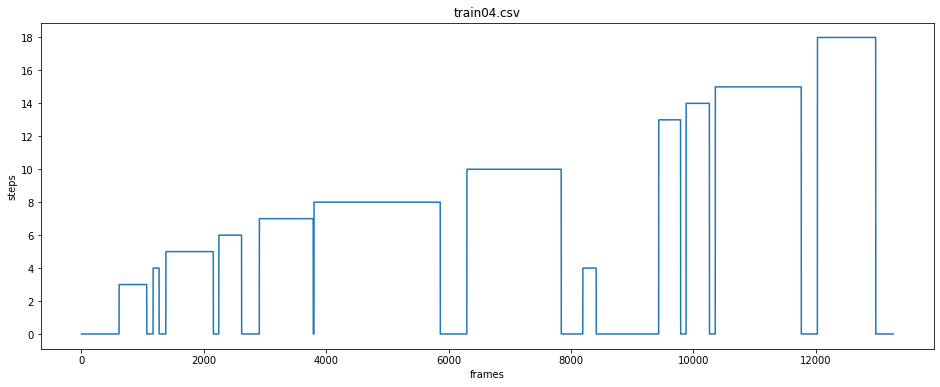

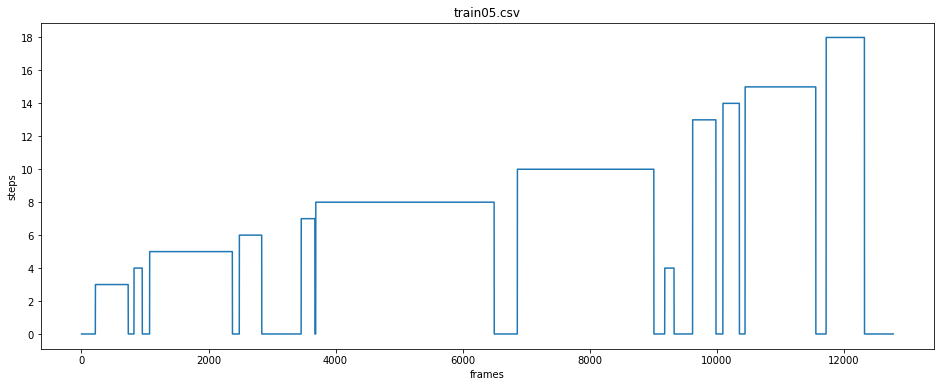

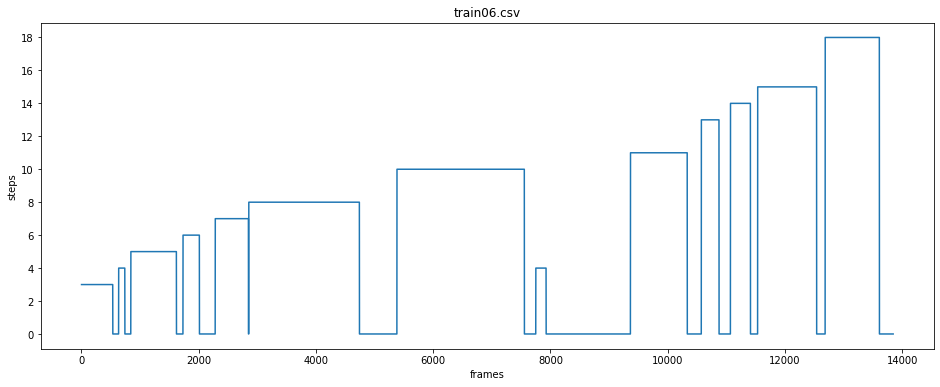

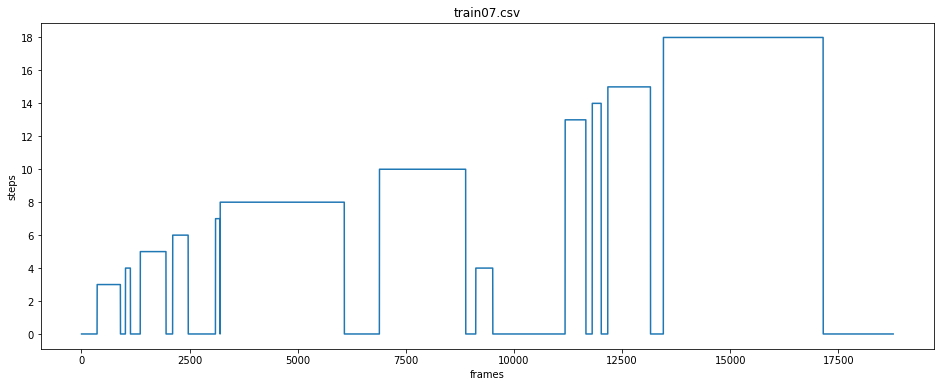

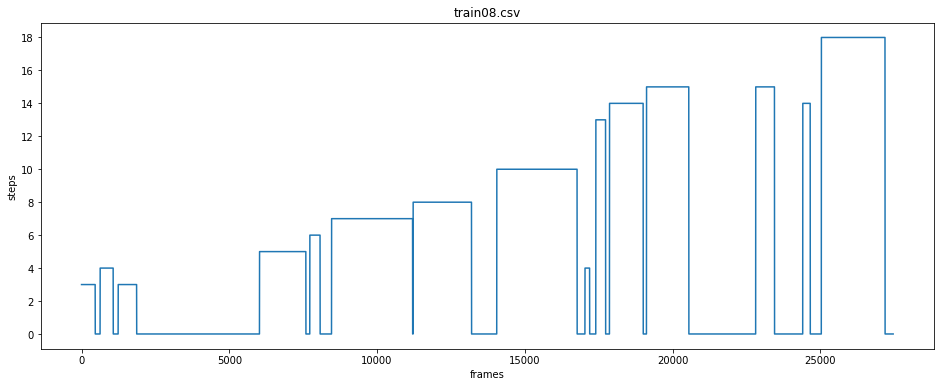

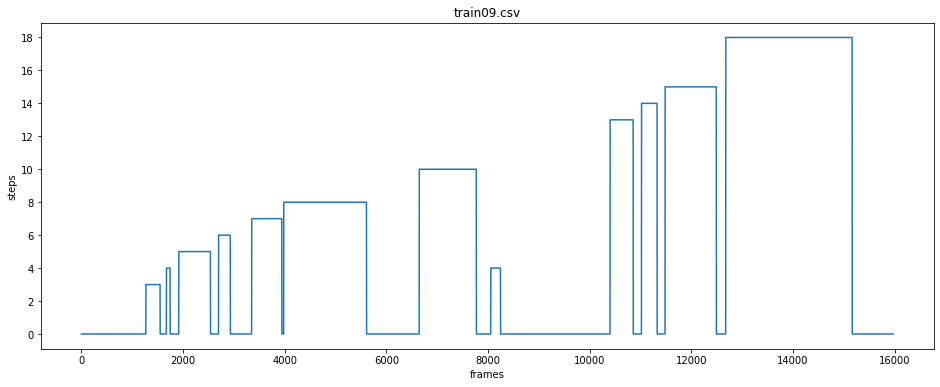

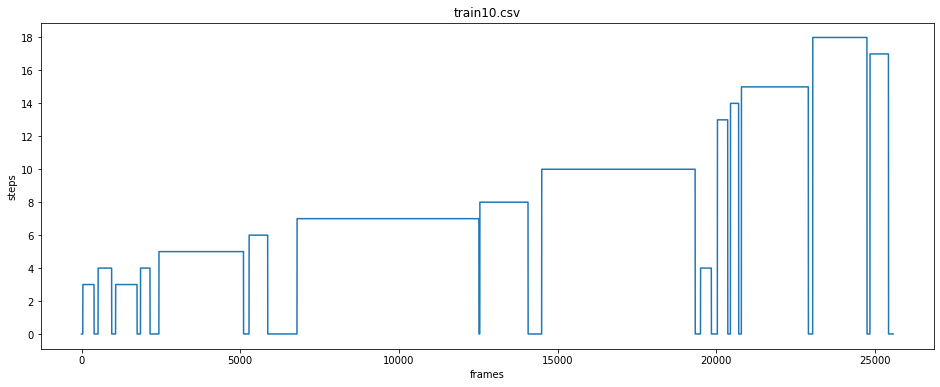

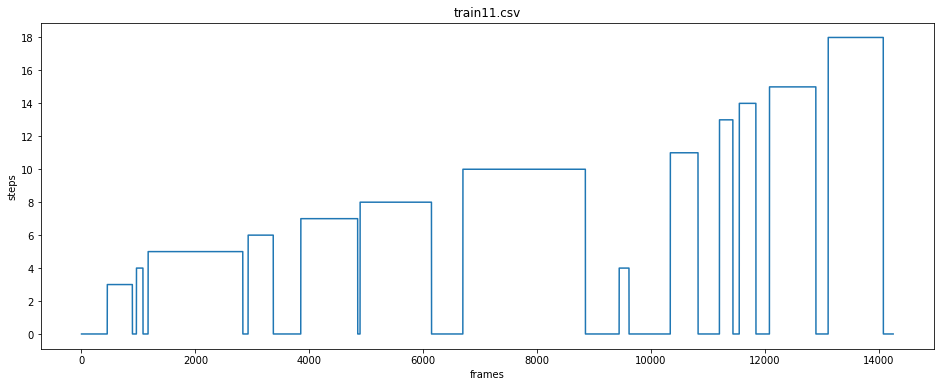

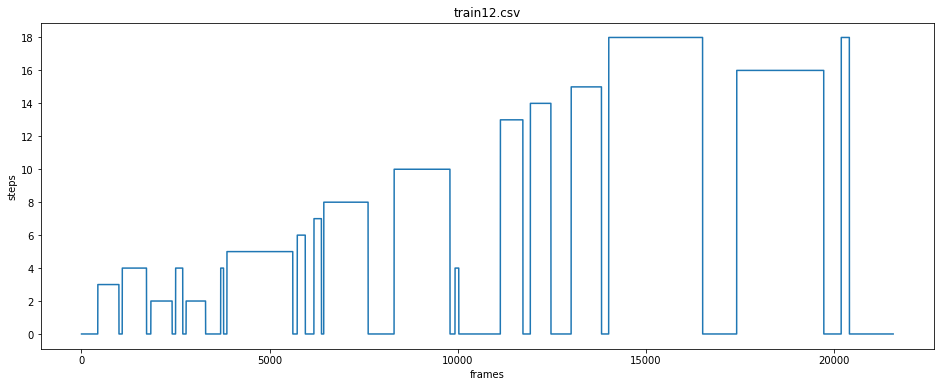

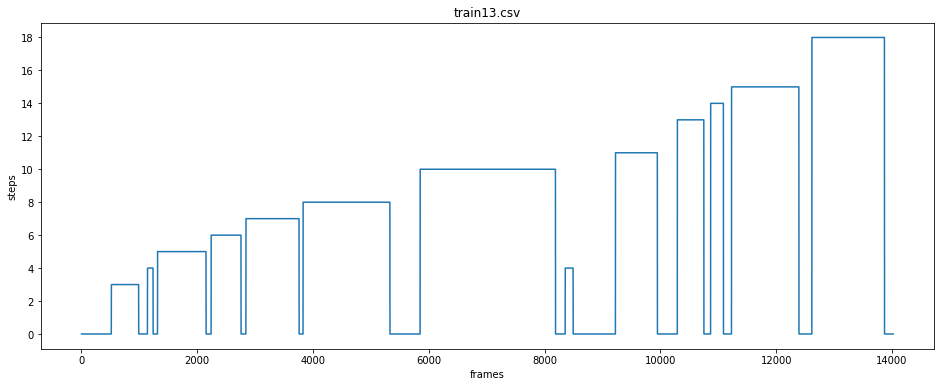

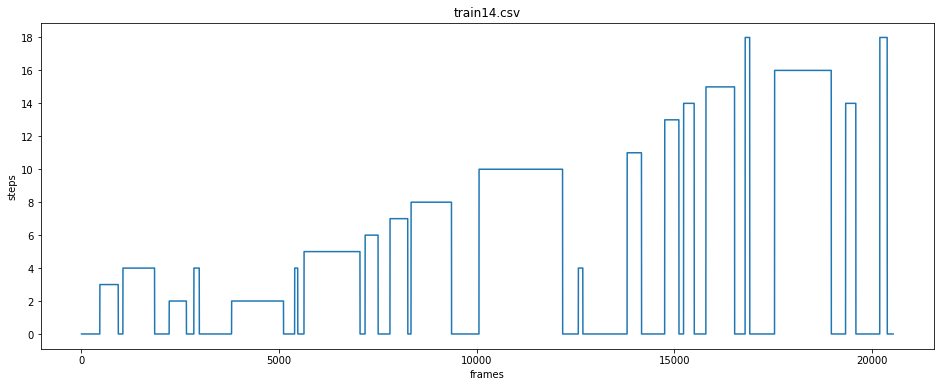

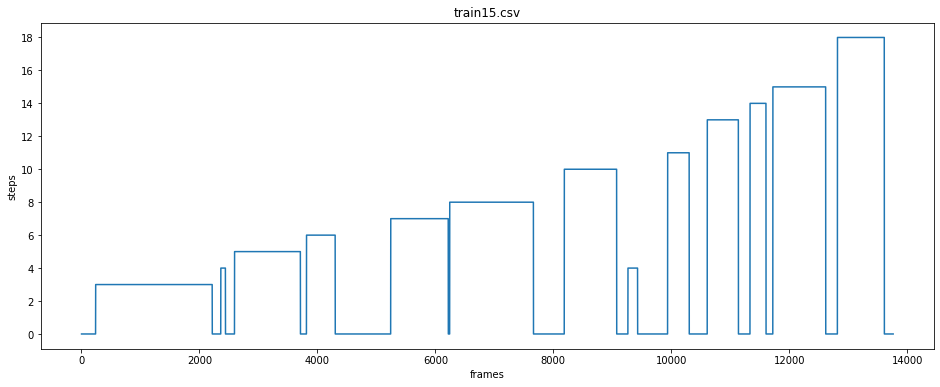

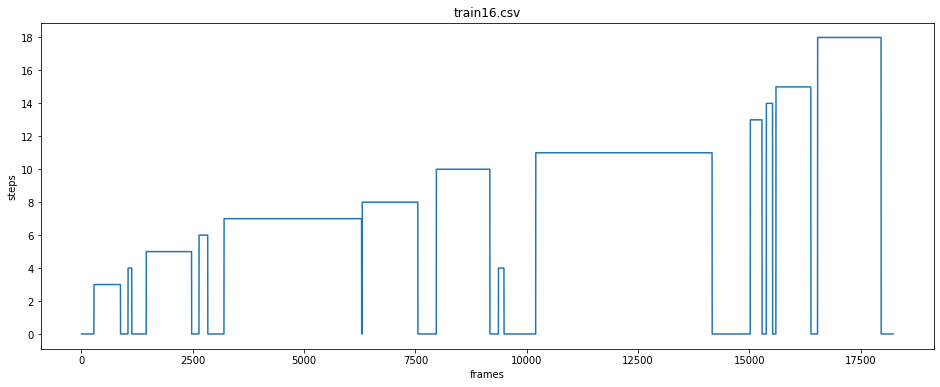

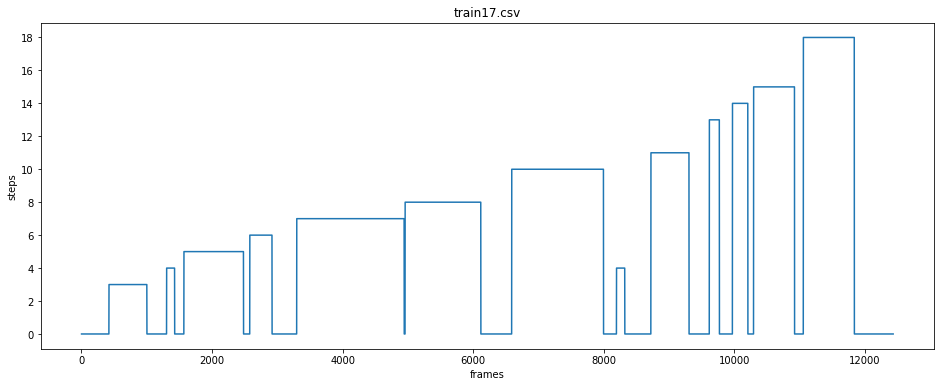

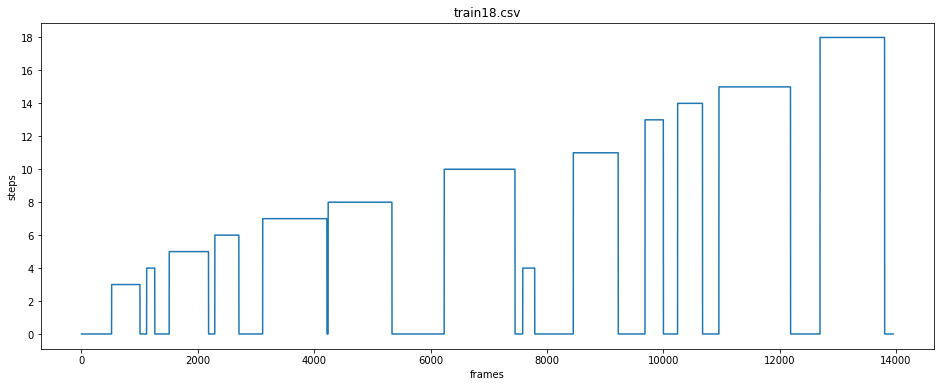

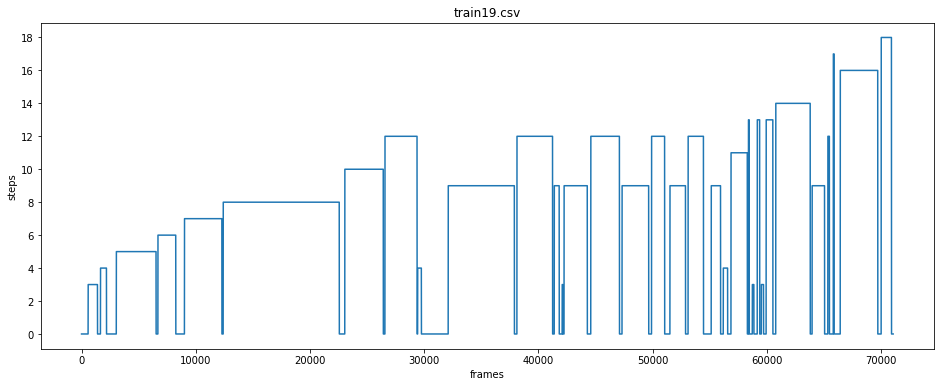

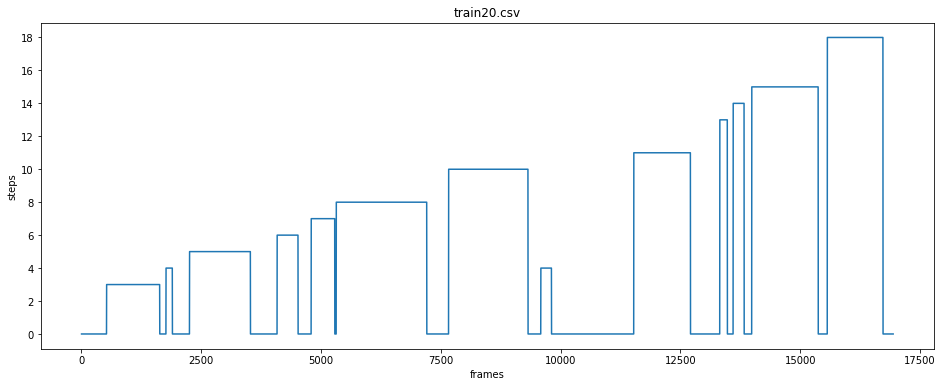

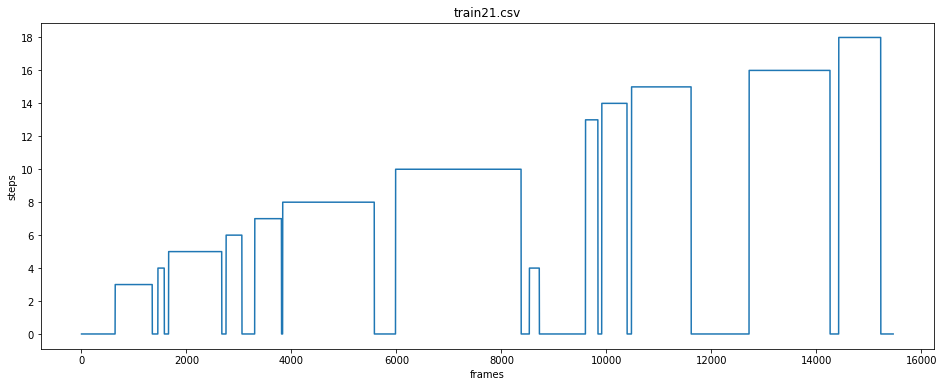

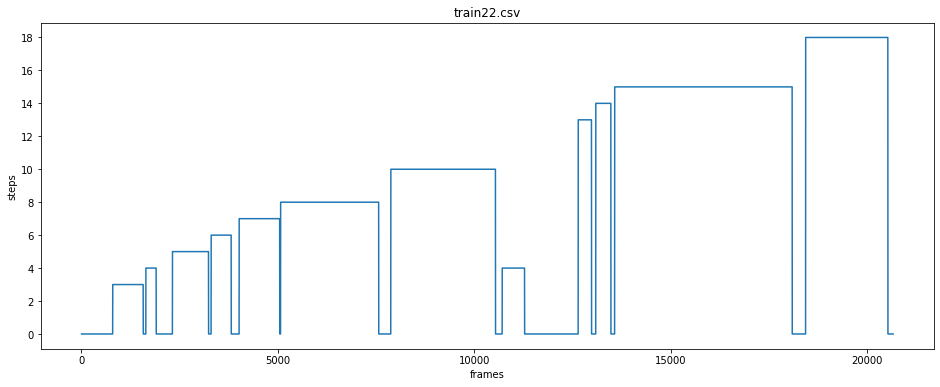

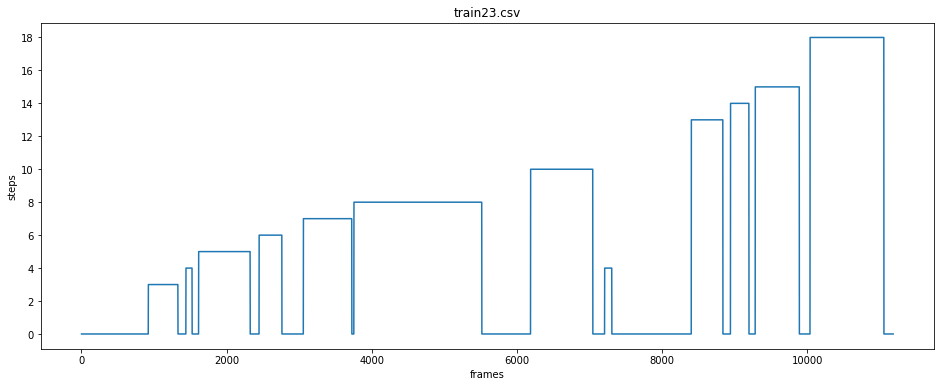

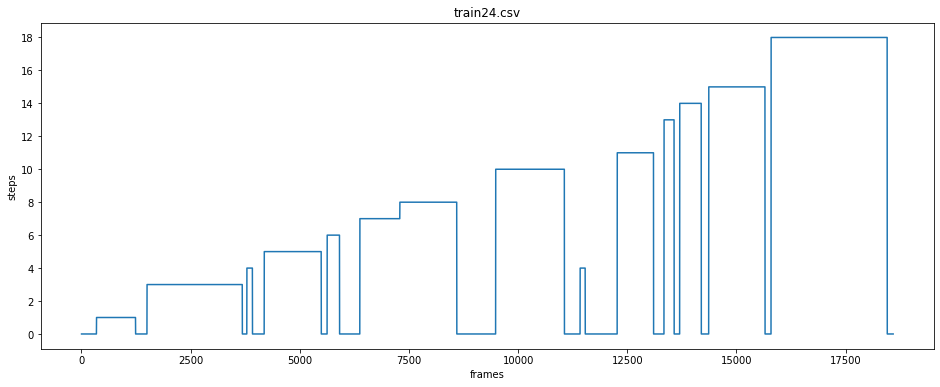

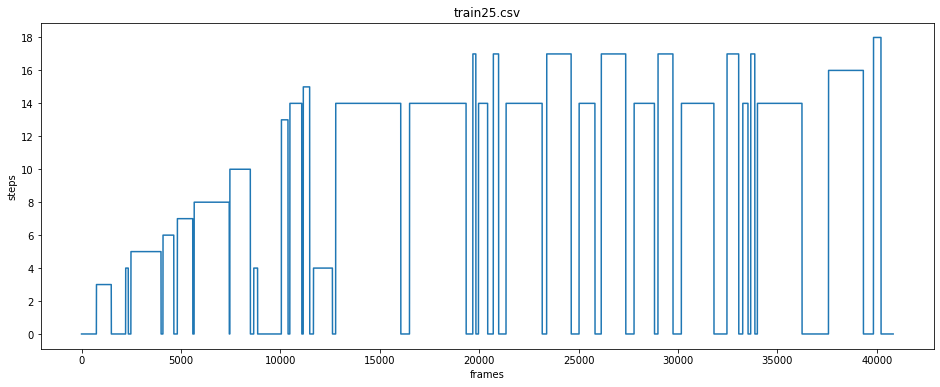

In [6]:
for csv_path in train_annos:
        df = pd.read_csv(csv_path)
        plt.figure(figsize=(16, 6))
        plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))  # 縦軸目盛を整数に
        
        plt.plot(df['Frame'], df['Steps'])
        plt.title(os.path.basename(csv_path))
        plt.xlabel('frames')
        plt.ylabel('steps')
        
        plt.show()